#Aluno: Thiago Fernandes Rosa

# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

In [16]:
#imports
import pandas as pd
import numpy as np

**1º Leitura dos Arquivos**

In [23]:
df_base1 = pd.read_csv('/content/base1.csv_')
df_base2 = pd.read_csv('/content/base2.csv_')
#display(df_base1)
#display(df_base2)
df_base1.info()
df_base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      670 non-null    int64 
 1   Unnamed: 0        670 non-null    int64 
 2   Age               670 non-null    int64 
 3   Sex               670 non-null    object
 4   Job               670 non-null    int64 
 5   Housing           670 non-null    object
 6   Saving accounts   547 non-null    object
 7   Checking account  409 non-null    object
 8   Credit amount     670 non-null    int64 
 9   Duration          670 non-null    int64 
 10  Purpose           670 non-null    object
 11  Risk              670 non-null    object
dtypes: int64(6), object(6)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0 

**2º Concatenação dos Dados**

In [24]:
#Concatenando as duas bases
df_dados_concatenados = pd.concat([df_base1, df_base2], axis = 0)
df_dados_concatenados.info()
display(df_dados_concatenados)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...,...
325,467,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
326,829,829,38,male,2,free,NaN,moderate,6681,48,business,good
327,296,296,20,female,2,rent,NaN,NaN,4675,12,car,good
328,235,235,30,male,3,own,little,little,1823,24,radio/TV,bad


**3º Tratamento de Dados Duplicados**

In [26]:
#criando um copia dos dados para editar sem alterar o original
df_dados_bckp = df_dados_concatenados.copy()

# removendo a coluna Unnamed: 0.1 que estava com dados duplicados, estava com a mesma informação da da Unnamed: 0
df_dados_bckp = df_dados_bckp.drop('Unnamed: 0.1', axis=1)

# removendo a Coluna Checking account, pois a quantidade dados NaN muito grande, inviabiliza o preenchimento do NaN com o dado que aparece mais.
df_dados_bckp = df_dados_bckp.drop('Checking account', axis=1)

display(df_dados_bckp)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,104,26,male,2,rent,NaN,2445,12,car,good
1,360,61,male,2,free,NaN,1239,18,education,good
2,695,50,male,2,rent,quite rich,1236,6,car,good
3,902,42,male,2,free,NaN,10477,36,car,good
4,312,26,female,2,own,little,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
325,467,32,male,2,own,NaN,7238,48,radio/TV,good
326,829,38,male,2,free,NaN,6681,48,business,good
327,296,20,female,2,rent,NaN,4675,12,car,good
328,235,30,male,3,own,little,1823,24,radio/TV,bad


**4º Tratamento de Valores Faltantes**

In [27]:
#identificar qual item que aparece com maior frequência
contagem1_saving_accounts = df_dados_bckp['Saving accounts'].value_counts()
display('Coluna Saving Accounts: ',contagem1_saving_accounts)


'Coluna Saving Accounts: '

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [29]:
# substituindo os NaN pelo item que apareceu com maior fequencia na coluna Saving accounts -  "little"
df_dados_bckp['Saving accounts'].fillna(value='little',inplace=True)
df_dados_bckp.info()
display(df_dados_bckp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 329
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   Age              1000 non-null   int64 
 2   Sex              1000 non-null   object
 3   Job              1000 non-null   int64 
 4   Housing          1000 non-null   object
 5   Saving accounts  1000 non-null   object
 6   Credit amount    1000 non-null   int64 
 7   Duration         1000 non-null   int64 
 8   Purpose          1000 non-null   object
 9   Risk             1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,104,26,male,2,rent,little,2445,12,car,good
1,360,61,male,2,free,little,1239,18,education,good
2,695,50,male,2,rent,quite rich,1236,6,car,good
3,902,42,male,2,free,little,10477,36,car,good
4,312,26,female,2,own,little,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
325,467,32,male,2,own,little,7238,48,radio/TV,good
326,829,38,male,2,free,little,6681,48,business,good
327,296,20,female,2,rent,little,4675,12,car,good
328,235,30,male,3,own,little,1823,24,radio/TV,bad


**5º Verificação de Outliers**

In [30]:
import matplotlib.pyplot as plt


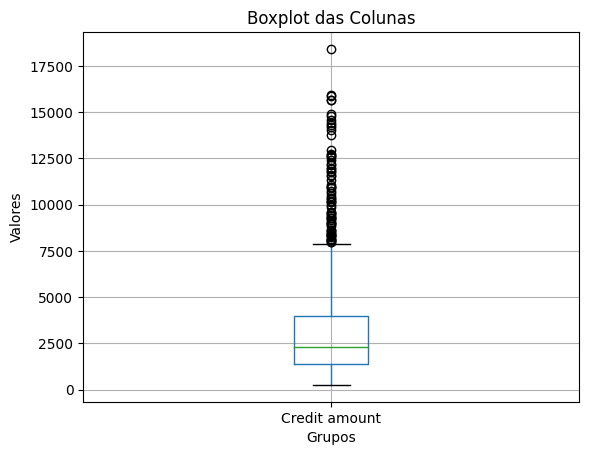

In [31]:

df_dados_bckp.boxplot(column= 'Credit amount')
plt.title('Boxplot das Colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

In [12]:
def identificar_outliers(df, coluna):
    # Calculando o primeiro e terceiro quartis
    Q1 = df[coluna].quantile(0.25) #Primeiro Quartil
    Q3 = df[coluna].quantile(0.75) #Terceiro Quartil

    # Calculando o IQR (Intervalo Interquartil)
    IQR = Q3 - Q1

    # Calculando os limites superior e inferior para identificar os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando outliers na coluna especificada
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    return outliers

In [15]:
outliers_encontrados = identificar_outliers(df_dados_bckp,'Credit amount')
outliers_encontrados

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
3,902,42,male,2,free,little,10477,36,car,good
6,832,29,male,2,rent,little,11816,45,business,bad
9,672,42,male,3,own,little,10366,60,car,good
37,291,28,male,3,rent,little,9398,36,car,bad
42,450,30,male,3,own,little,11054,36,car,good
...,...,...,...,...,...,...,...,...,...,...
244,657,37,male,2,own,little,10222,48,radio/TV,good
266,395,32,male,2,rent,moderate,11760,39,education,good
270,818,43,male,3,own,little,15857,36,vacation/others,good
297,653,42,male,3,own,moderate,8086,36,car,bad
